In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import fbprophet as fb

In [3]:
cycles0 = pd.read_csv("/media/ramya/D/hackathon/clue_hackathon_code/data/cycles0.csv")
tracking = pd.read_csv("/media/ramya/D/hackathon/clue_hackathon_code/data/tracking.csv")


In [7]:
symptoms = [
    'happy', 'pms', 'sad', 'sensitive_emotion',
    'energized', 'exhausted', 'high_energy', 'low_energy',
    'cramps', 'headache', 'ovulation_pain', 'tender_breasts',
    'acne_skin', 'good_skin', 'oily_skin', 'dry_skin'
]

In [8]:
tracking

,user_id,cycle_id,day_in_cycle,date,category,symptom
0,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,17,2016-03-06,sleep,6-9
1,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,sleep,6-9
2,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,skin,oily_skin
3,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,motivation,unmotivated
4,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,mental,distracted
5,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,hair,good_hair
6,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,21,2016-03-10,hair,bad_hair
7,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,exercise,running
8,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,16,2016-03-05,energy,high_energy
9,e866e51b-d95d-4a47-879c-c7f0c8f7bdff,7,22,2016-03-11,energy,exhausted


In [9]:
test_user = pd.unique(cycles0.user_id)[0]
data_test = tracking[(tracking.user_id == test_user) &
                     (tracking.symptom == symptoms[0])
                    ][['date', 'symptom']]

data_test.symptom.replace('happy', 1, inplace=True)
data_test.rename(index=str, columns={"date":"ds", "symptom":"y"}, inplace=True)

In [10]:
data_test

,ds,y
104308,2016-05-25,1
104312,2016-06-25,1
104317,2016-07-24,1
104320,2016-08-22,1
104325,2016-11-27,1


In [17]:
df = pd.DatetimeIndex(data_test.ds)

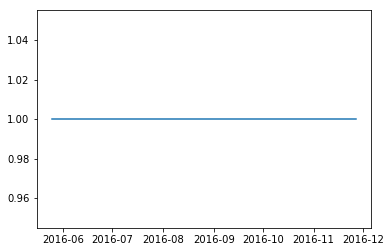

In [20]:
plt.plot(df, data_test.y)